In [48]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, img_as_ubyte, color
from skimage.filters import threshold_multiotsu
from sklearn.mixture import GaussianMixture as GMM
# Read images
!wget "https://prod-images-static.radiopaedia.org/images/5102272/9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg"
!wget "https://images.squarespace-cdn.com/content/v1/5e2803765b739101d3ba4277/1596954629362-JWSVAKC0KMAS4EZVPWK5/Kidney%2BCancer%2BCoronal%2BCT.jpg"



--2022-02-06 12:42:16--  https://prod-images-static.radiopaedia.org/images/5102272/9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg
Resolving prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)... 104.26.9.61, 104.26.8.61, 172.67.72.247, ...
Connecting to prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)|104.26.9.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36015 (35K) [image/jpeg]
Saving to: ‘9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg.7’

9e19a6982f87a8d3cb8 100%[===================>]  35.17K  --.-KB/s    in 0s      

2022-02-06 12:42:16 (90.1 MB/s) - ‘9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg.7’ saved [36015/36015]

--2022-02-06 12:42:17--  https://images.squarespace-cdn.com/content/v1/5e2803765b739101d3ba4277/1596954629362-JWSVAKC0KMAS4EZVPWK5/Kidney%2BCancer%2BCoronal%2BCT.jpg
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connec

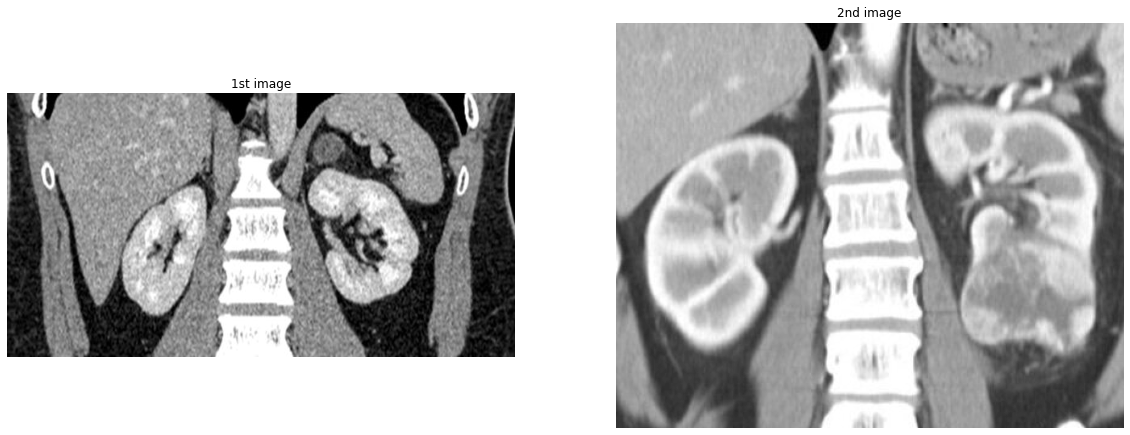

In [108]:
"""Gaussian segmentation"""
# read the image of a plant seedling as grayscale from the outset
img = io.imread("9e19a6982f87a8d3cb8f28b025c2ad_big_gallery.jpg")
img3 = io.imread("Kidney+Cancer+Coronal+CT.jpg")
#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy
image = color.rgb2gray(img)
image2 = color.rgb2gray(img3)

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN
img4 = img3.reshape((-1,3))  #-1 reshape means, in this case MxN

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=3, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])

#Gaussian segmentation on second image
gmm_model2 = GMM(n_components=4, covariance_type='full').fit(img4)  #tied works better than full
gmm_labels2 = gmm_model.predict(img4)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape2 = img3.shape
segmented2 = gmm_labels2.reshape(original_shape2[0], original_shape2[1])

#Let us look at 2 input images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 25))

# Plotting the 1st image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('1st image')
ax[0].axis('off')

# Plotting the 2nd image.
ax[1].imshow(image2, cmap='gray')
ax[1].set_title('2nd image')
ax[1].axis('off')
plt.subplots_adjust()

plt.show()

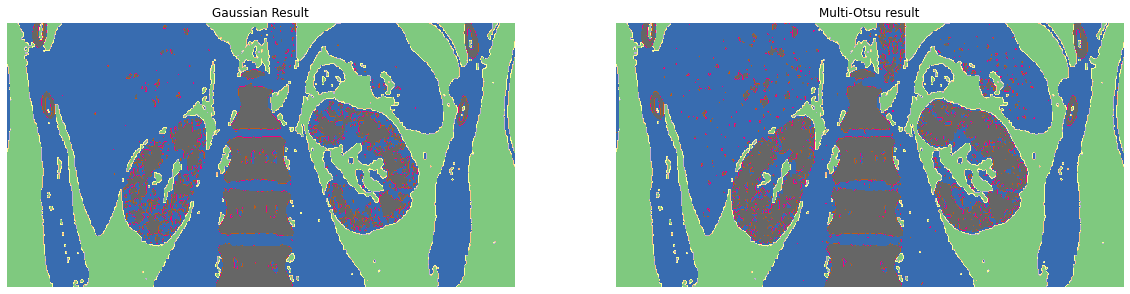

In [109]:
"""multi-Otsu segmentation"""

# Apply multi-Otsu threshold for the first image
thresholds = threshold_multiotsu(image, classes=3)
# segment the first image into multiple classes with Digitize.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(image, bins=thresholds)
#output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8
#plt.imsave("images/Otsu_Segmented.jpg", output)


#Let us look at the 1st input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 25))

# Plotting the Gaussian result.
ax[0].imshow(segmented, cmap='Accent')
ax[0].set_title('Gaussian Result')
ax[0].axis('off')

# Plotting the Multi Otsu result.
ax[1].imshow(regions, cmap='Accent')
ax[1].set_title('Multi-Otsu result')
ax[1].axis('off')
plt.subplots_adjust()

plt.show()



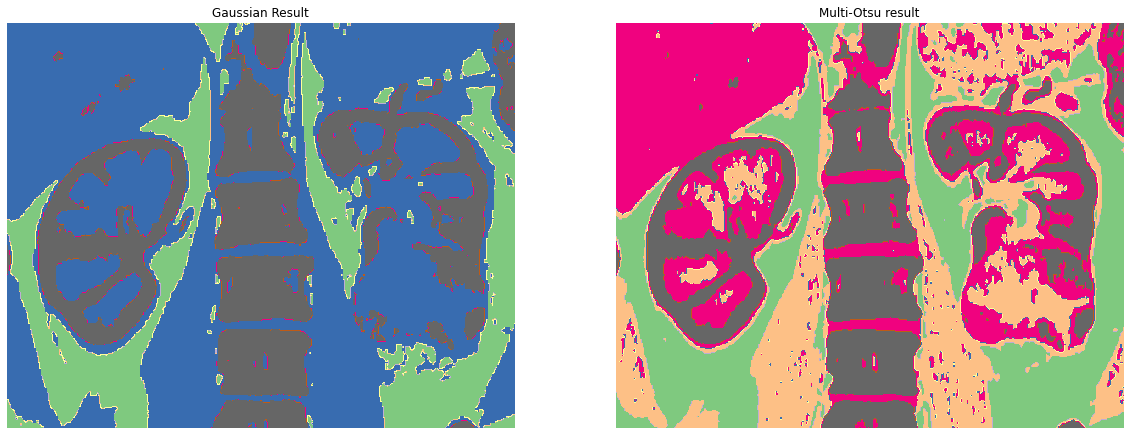

In [110]:
### second image, same operation
# Apply multi-Otsu threshold for the second image
thresholds2 = threshold_multiotsu(image2, classes=4)

regions2 = np.digitize(image2, bins=thresholds2)

#Let us look at the 1st input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 25))

# Plotting the Gaussian result.
ax[0].imshow(segmented2, cmap='Accent')
ax[0].set_title('Gaussian Result')
ax[0].axis('off')

# Plotting the Multi Otsu result.
ax[1].imshow(regions2, cmap='Accent')
ax[1].set_title('Multi-Otsu result')
ax[1].axis('off')
plt.subplots_adjust()

plt.show()